<a href="https://colab.research.google.com/github/TabithaWKariuki/ULA/blob/main/uber_lyft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Loading and understanding the data**

In [ ]:
# Importing the libraries; pandas, numpy, matplotlib and seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# cabfile = '/content/drive/MyDrive/cab_rides.csv'

In [ ]:
#loading and previewing the data
df_rides = pd.read_csv('cab_rides.csv')
#df_rides = pd.read_csv(cabfile)
df_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
# Accessing the dataset's information

df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


### **Data Preparation**

In [ ]:
# Data Cleaning Action: Dropping the id column
# Explanation: it is not needed for the analysis

df_rides.drop("id", axis = 1, inplace=True)
df_rides.head(20)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,lyft_luxsuv,Lux Black XL


In [ ]:
# Data Cleaning Action: Checking for missing values

df_rides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
product_id              0
name                    0
dtype: int64

The price column has missing values

In [ ]:
# Data Cleaning Action: Dropping missing values
# Explanation: Price is an important factor for analysis which varies based on
#multiple factors so the records which do not have the price available are not necessary.


df_rides.dropna(subset=["price"], inplace = True)

In [ ]:
#confirming that rows with price column null have been dropped

df_rides.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
product_id          0
name                0
dtype: int64

In [ ]:
#Data Cleaning Action: Checking for duplicate rows

df_rides.duplicated().any()

True

In [ ]:
#Data Cleaning Action: Dropping duplicates

df_rides.drop_duplicates(inplace=True)

In [ ]:
#confirming no duplicates
df_rides.duplicated().any()

False

In [ ]:
df_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL


In [ ]:
#Data Cleaning Action: Converting from epoch time format to datetime to better understand the time column. 
from datetime import datetime

df_rides['time_stamp'] = df_rides.time_stamp.apply(lambda x: datetime.fromtimestamp(x/1000))
df_rides.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux


In [ ]:
#separating the date and time components to make analysis easier


df_rides['date_only'] = df_rides['time_stamp'].dt.date
df_rides['time_only'] = df_rides['time_stamp'].dt.time

#df_rides.drop('time_stamp', axis=1, inplace=True)
df_rides.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_only,time_only
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,2018-12-16,09:30:07.890000
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,2018-11-27,02:00:23.677000


In [ ]:
#Creating columns for Month, Hour and Weekdays to be used for analysis and visualisation
df_rides['Month'] = df_rides['time_stamp'].dt.month
df_rides['Hour'] = df_rides['time_stamp'].dt.hour
df_rides['Day'] =  df_rides['time_stamp'].dt.strftime('%A')
df_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_only,time_only,Month,Hour,Day
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,2018-12-16,09:30:07.890000,12,9,Sunday
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,2018-11-27,02:00:23.677000,11,2,Tuesday
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,2018-11-28,01:00:22.198000,11,1,Wednesday
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,2018-11-30,04:53:02.749000,11,4,Friday
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,2018-11-29,03:49:20.223000,11,3,Thursday


### **Data Analysis and Visualization**

#### Distribution of Rides per day

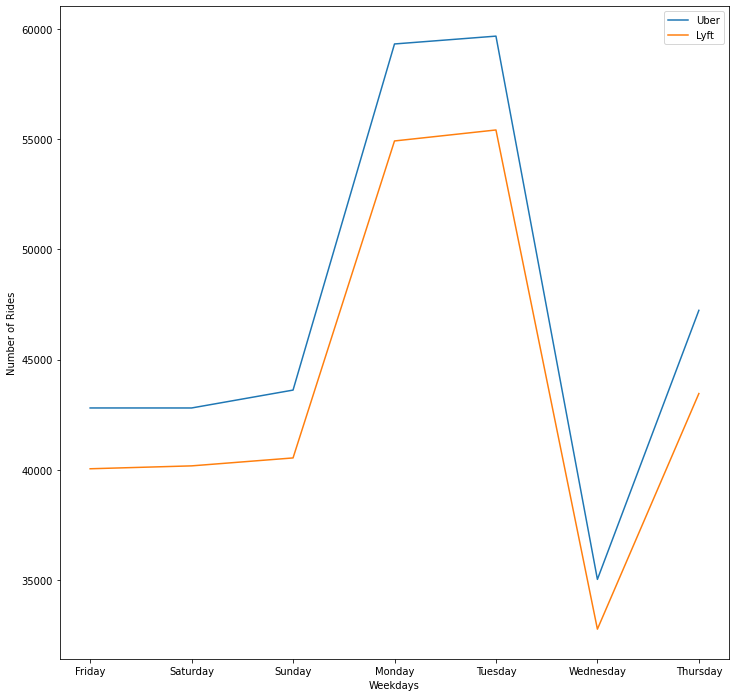

In [ ]:
# Plotting the days with higher utilization of cabs
# 
#getting the counts per day when the cab type is uber, then when it's lyft
#reindexing the information so that Friday can be the first day
uber_day_count = df_rides[df_rides['cab_type'] == 'Uber']['Day'].value_counts()
uber_day_count = uber_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])
lyft_day_count = df_rides[df_rides['cab_type'] == 'Lyft']['Day'].value_counts()
lyft_day_count = lyft_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])

#plotting the index which is the days of the week on the x axis and the counts on the y axis
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(uber_day_count.index, uber_day_count, label = 'Uber')
ax.plot(lyft_day_count.index, lyft_day_count, label = 'Lyft')
ax.set(ylabel = 'Number of Rides', xlabel = 'Weekdays')
ax.legend()
plt.show()

The days with the most rides ordered are Mondays and Tuesdays (Tuesdays are the highest), while the day with the least is Wednesdays for both Uber and Lyft.

#### Distribution of Rides in each day

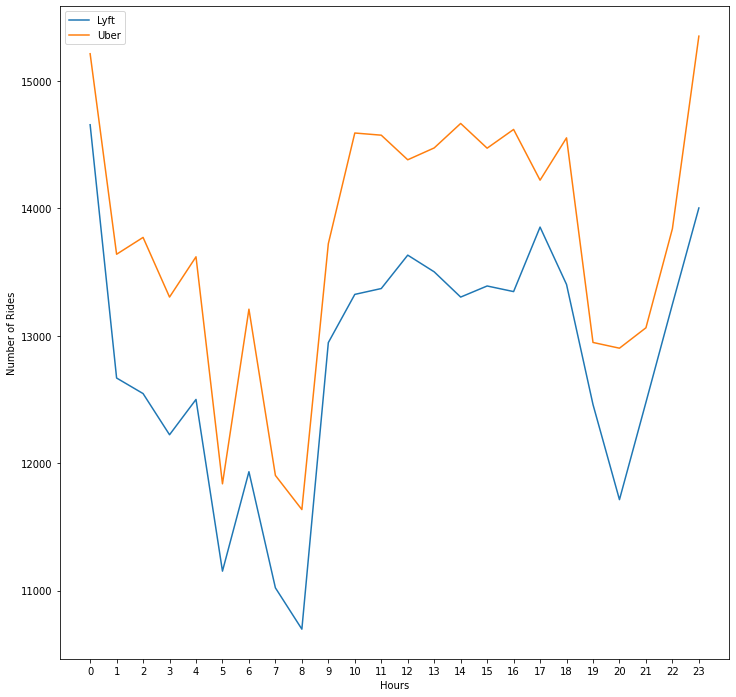

In [ ]:
# Plotting the hours in which cabs are mostly taken

#getting the counts per hour when the cab type is uber, then when it's lyft and plotting this on the y axis
#plotting the index of the group, which is the hour of the day, on the x axis
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(df_rides[df_rides['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, df_rides[df_rides['cab_type'] == 'Lyft'].groupby('Hour').Hour.count(), label = 'Lyft')
ax.plot(df_rides[df_rides['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, df_rides[df_rides['cab_type'] =='Uber'].groupby('Hour').Hour.count(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Number of Rides')
plt.xticks(range(0,24,1))
plt.show()

Rides are most often requested around midnight, and during the day the most active hours are between 10 am and 6 pm.

#### Average Price per Distance per Cab Service comparison

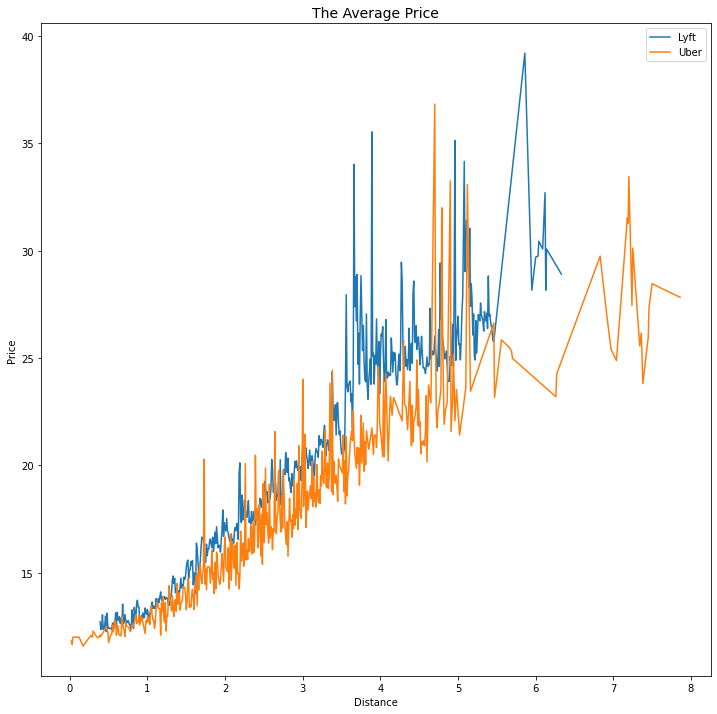

In [ ]:

# Plotting Prices per distance per cab service
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(df_rides[df_rides['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df_rides[df_rides['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df_rides[df_rides['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df_rides[df_rides['cab_type'] =='Uber'].groupby('distance').price.mean(), label = 'Uber')
ax.set_title('The Average Price', fontsize= 14)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()



Shows that Lyft prices are marginally higher than Uber prices

#### Destinations with highest Surge in prices

In [ ]:
high_surge_trip = df_rides[df_rides["surge_multiplier"] >= 1.5]
location_wise_surge = high_surge_trip.groupby(["source", "destination"]).size().reset_index()

[Text(0, 0, 'Theatre District South Station'),
 Text(0, 0, 'Fenway Financial District'),
 Text(0, 0, 'Theatre District Boston University'),
 Text(0, 0, 'Northeastern University North Station'),
 Text(0, 0, 'Back Bay Haymarket Square'),
 Text(0, 0, 'Haymarket Square Financial District'),
 Text(0, 0, 'Haymarket Square West End'),
 Text(0, 0, 'North End Back Bay'),
 Text(0, 0, 'Haymarket Square North Station'),
 Text(0, 0, 'Haymarket Square Beacon Hill')]

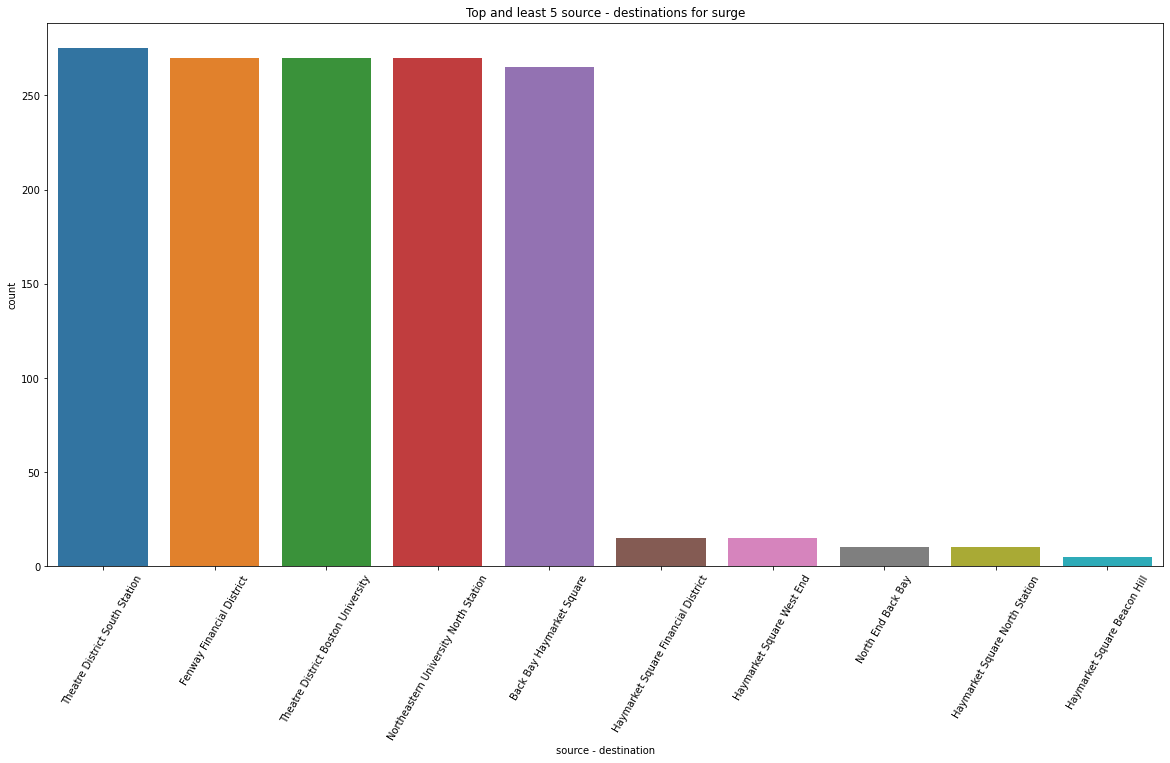

In [ ]:

location_wise_surge.columns=["source", "destination", "count"]
location_wise_surge.sort_values(inplace=True, ascending=False, by=["count"])
#highest and lowest when the surge multiplier is >= 1.5
highest_destination_surge = location_wise_surge.head(5)
lowest_destination_surge = location_wise_surge.tail(5)
# highest_destination_surge
destination_surge_df = highest_destination_surge.append(lowest_destination_surge, ignore_index=True)
destination_surge_df["source - destination"] = destination_surge_df["source"] + " " + destination_surge_df["destination"]
plt.figure(figsize=(20, 10))
g = sns.barplot(data = destination_surge_df, x = "source - destination", y = "count")
g.set_title("Top and least 5 source - destinations for surge")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=60)

The top 5 routes affected by the surge multiplier include:
* Theatre District - South Station
* Fenway-Financial District
* Theatre District - Boston University
* Northeastern University-North Station
* Back Bay-Haymarket Square.

The lowest 5 (where the surge multiplier was greater than or equal to 1.5) include:
* Haymarket Square-Financial District
* Haymarket Square-West End
* North End-Back Bay
* Haymarket Square-North Station
* Haymarket Square-Beacon Hill

#### Determining Commonest Trips (From Source to Destination)

In [ ]:
# Creating Separate Dataframes for the Two cab types

uber_df = df_rides[df_rides['cab_type'] =="Uber"]
lyft_df = df_rides[df_rides['cab_type'] =="Lyft"]


In [ ]:
# We do this by joining the source and destination of the trips
uber_source_destination_df= uber_df.groupby(['source', "destination"]).size().reset_index()
uber_source_destination_df.columns = ["source", "destination", "count"]
uber_source_destination_df.sort_values("count", inplace=True, ascending = False)
uber_top_trips = uber_source_destination_df.iloc[0:10, ]
uber_top_trips["Source - Destination"] = uber_source_destination_df["source"] + " - " + uber_source_destination_df["destination"]

# So the top Source - Destination (routes) for Uber
uber_top_trips = uber_top_trips[["Source - Destination", "count"]]
uber_top_trips

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Source - Destination,count
56,South Station - Financial District,4907
29,Financial District - South Station,4906
36,North End - Back Bay,4866
3,Back Bay - North End,4866
67,West End - Fenway,4830
23,Fenway - West End,4829
32,Haymarket Square - Financial District,4824
26,Financial District - Haymarket Square,4822
37,North End - Beacon Hill,4794
9,Beacon Hill - North End,4794


In [ ]:
# Joining the source and destination of the trips for Lyft
Lyft_source_destination_df= lyft_df.groupby(['source', "destination"]).size().reset_index()
Lyft_source_destination_df.columns = ["source", "destination", "count"]
Lyft_source_destination_df.sort_values("count", inplace=True, ascending = False)
lyft_top_trips = Lyft_source_destination_df.iloc[0:10, ]
lyft_top_trips["Source - Destination"] = Lyft_source_destination_df["source"] + " - " + Lyft_source_destination_df["destination"]

# So the top Source - Destination (routes) for Lyft
lyft_top_trips = lyft_top_trips[["Source - Destination", "count"]]
lyft_top_trips

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Source - Destination,count
29,Financial District - South Station,4626
56,South Station - Financial District,4625
3,Back Bay - North End,4548
36,North End - Back Bay,4547
67,West End - Fenway,4530
23,Fenway - West End,4530
32,Haymarket Square - Financial District,4506
26,Financial District - Haymarket Square,4504
37,North End - Beacon Hill,4446
9,Beacon Hill - North End,4444


#### Times with the high surges

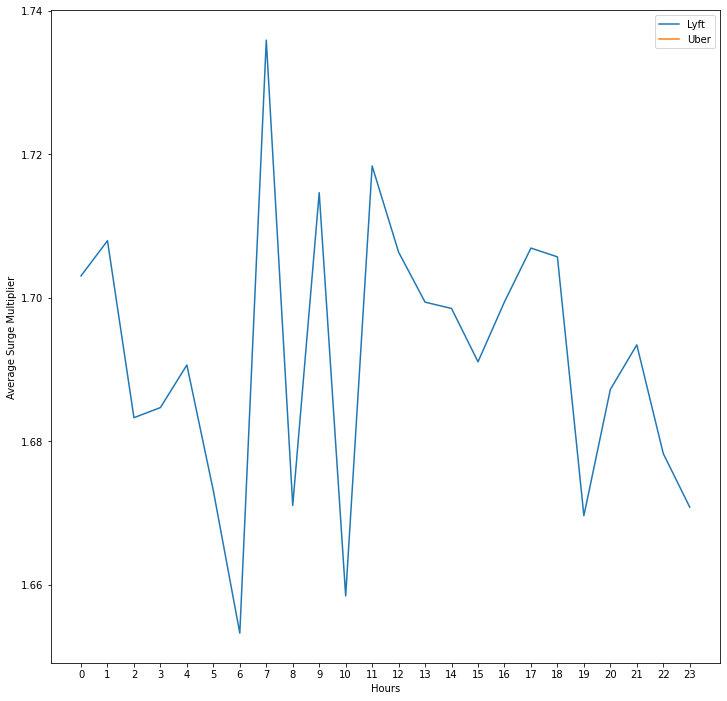

In [ ]:
#Determining the times with high surges
#grouping by hour and plotting the hour on the x axis and surge multiplier on the y axis
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(high_surge_trip[high_surge_trip['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, high_surge_trip[high_surge_trip['cab_type'] == 'Lyft'].groupby('Hour').surge_multiplier.mean(), label = 'Lyft')
ax.plot(high_surge_trip[high_surge_trip['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, high_surge_trip[high_surge_trip['cab_type'] =='Uber'].groupby('Hour').surge_multiplier.mean(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Average Surge Multiplier')
plt.xticks(range(0,24,1))
plt.show()

Only Lyft has surge prices, and 
Surge prices are highest at 7AM

#### Determining the Commonest Rides

In [ ]:
# Looking at separation between Uber and Lyft Cabs
df_rides["cab_type"].value_counts()

Uber    330518
Lyft    307387
Name: cab_type, dtype: int64

In [ ]:
#Determining the Commonest Cab rides for Lyft
lyft_df["name"].value_counts()

Shared          51233
Lux             51232
Lux Black XL    51231
Lyft XL         51231
Lux Black       51231
Lyft            51229
Name: name, dtype: int64

In [ ]:
#Determining the Commonest Cab rides for Uber
uber_df["name"].value_counts()

UberX        55088
Black SUV    55088
UberXL       55086
WAV          55086
Black        55085
UberPool     55085
Name: name, dtype: int64

#### Shared Rides

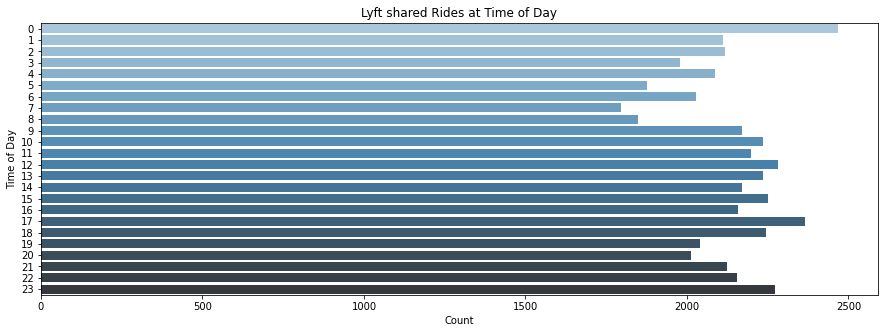

In [ ]:
# From Data above, we see that Lyft has Shared rides, so we can determine what time of day these are common
lyft_shared_rides_df = lyft_df[lyft_df["name"] == "Shared"]
lyft_shared_rides_df = lyft_shared_rides_df.groupby(["name", "Hour"]).size().reset_index()
lyft_shared_rides_df.columns = ["Name", "Time of Day", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(y="Time of Day", x="Count", data=lyft_shared_rides_df, palette="Blues_d", orient ='h').set_title("Lyft shared Rides at Time of Day");

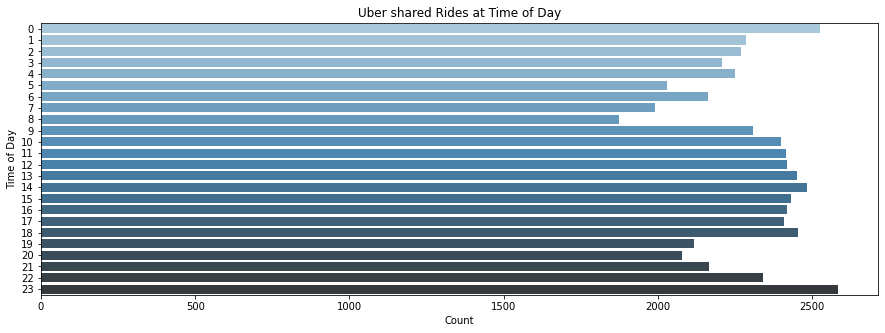

In [ ]:
# From Data above, we see that Uber has Pooled rides, so we can determine what time of day these are common
uber_shared_rides_df = uber_df[uber_df["name"] == "UberPool"]
uber_shared_rides_df = uber_shared_rides_df.groupby(["name", "Hour"]).size().reset_index()
uber_shared_rides_df.columns = ["Name", "Time of Day", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(y="Time of Day", x="Count", data=uber_shared_rides_df, palette="Blues_d", orient ='h').set_title("Uber shared Rides at Time of Day");

**Conclusions.**



*   The days with the most rides ordered are Mondays and Tuesdays (Tuesdays are the highest), while the day with the least is Wednesdays for both Uber and Lyft.
*   Rides are most often requested around midnight, and during the day the most active hours are between 10 am and 6 pm.


*   Rides are most often requested around midnight, and during the day the most active hours are between 10 am and 6 pm.
*   Only Lyft has surge prices, and surge prices are highest at 7AM. There are also peaks at 9am and 11 am. The lowest effect of the surge multiplier is at 6am. It is also low at 10am.

*   The route with the highest surge is  from Theatre District to South station 
*   The route with the least surge is from Haymarket Square to Beacon Hill















**Recommendations.**





*   Uber was determined to be the cheaper option overall. Additionally, varying times did not trigger an increase in the value of the surge multiplier unlike Lyft. We therefore recommend Uber overall as the more affordable choice.
*    If using a Lyft, we recommend doing so at 6 am or 10am, as the value of the surge multiplier is low therefore the prices will be more friendly. At 7am, 9am, and 11am,  the value of the surge multiplier is quite high so we would advise not to take a Lyft particularly at these times.
*  Riders using Lyft on the Theatre District to South Station route should commute with caution since this is the route with the highest surge.







